In [31]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
import warnings 
warnings.filterwarnings('ignore')

# Data Preprocessing

In [2]:
df=pd.read_csv('Data file.csv')
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [3]:
df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

<AxesSubplot:>

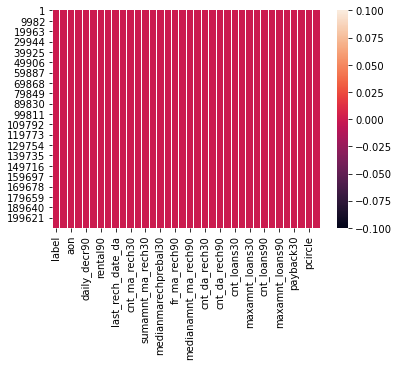

In [4]:
sns.heatmap(df.isnull())

There are no columns with null value hence there is no requirement of replacing in null valuesThere are no null values in dataset

In [5]:
df.dtypes

label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209593 entries, 1 to 209593
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [7]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


# EDA Analysis

In [8]:
dfcorr=df.corr()
dfcorr

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,...,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,...,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,...,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,...,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,...,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,...,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,...,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,...,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,...,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,...,0.765802,0.752296,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362


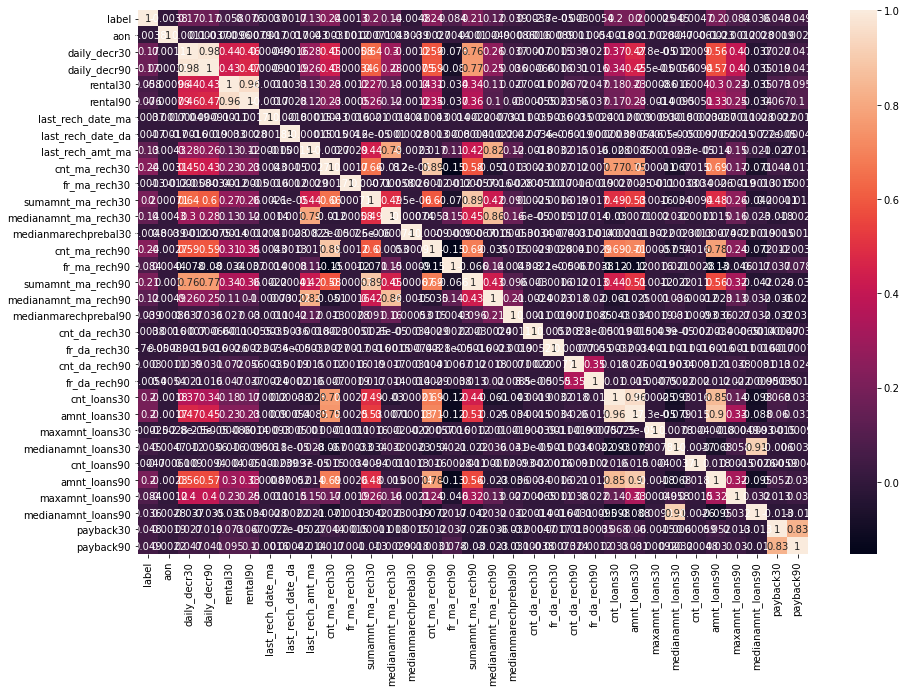

In [9]:
plt.figure(figsize=(15,10))
sns.heatmap(dfcorr,annot=True)
plt.show()

We are unable to identify correltion in above heatmap due to large number of columns. Let's print the correlation values of independent variable with target variable in sorted form.


In [10]:
df.shape

(209593, 36)

In [11]:
df["label"].value_counts()

1    183431
0     26162
Name: label, dtype: int64

<AxesSubplot:>

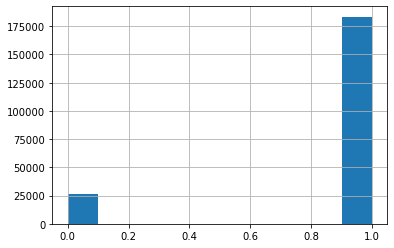

In [12]:
df["label"].hist(grid=True) #example of univariate analysis

<AxesSubplot:xlabel='label', ylabel='count'>

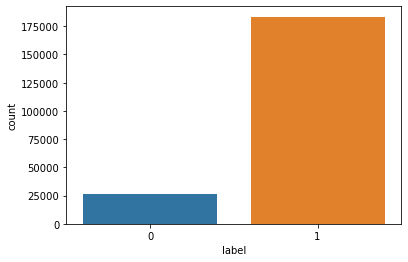

In [13]:
sns.countplot(df['label'])

Here we can see there is problem of class imbalance. Column "label" values 0 and 1 are not balanced. value 1 has more count than value 0.

In [14]:
df.shape

(209593, 36)

In [15]:
df.skew()

label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans9

We can see that skewness is present in all columns except label column which is our target column.

<AxesSubplot:xlabel='daily_decr30', ylabel='Density'>

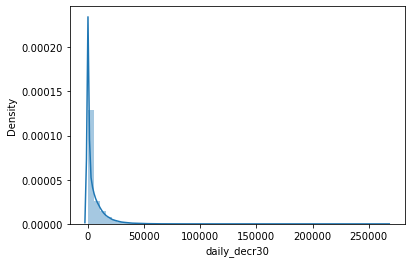

In [16]:
sns.distplot(df['daily_decr30'])

<AxesSubplot:xlabel='medianmarechprebal90', ylabel='Density'>

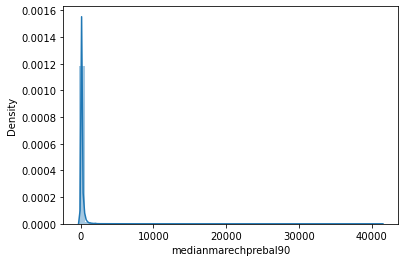

In [17]:
sns.distplot(df['medianmarechprebal90'])

<AxesSubplot:xlabel='daily_decr30', ylabel='label'>

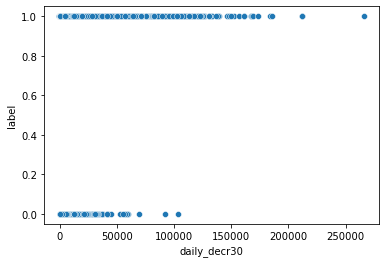

In [18]:
sns.scatterplot(df['daily_decr30'],df['label'],data=df)

<AxesSubplot:xlabel='rental30', ylabel='label'>

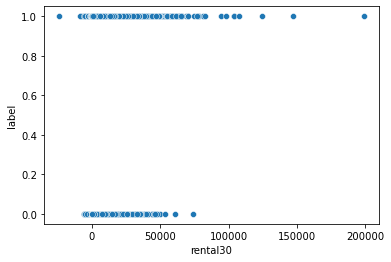

In [19]:
sns.scatterplot(df['rental30'],df['label'],data=df)

In [20]:
df["pcircle"].value_counts()

UPW    209593
Name: pcircle, dtype: int64

In [21]:
x=df.drop("label",axis=1)
y=df.label

In [22]:
x=x.drop(["pcircle","pdate","msisdn"],axis=1)
x

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
1,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
2,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
3,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
4,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
5,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209589,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,...,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000
209590,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,...,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000
209591,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,...,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333
209592,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,...,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000


In [23]:
x.columns

Index(['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')

# Modeling

In [24]:
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=i, test_size=0.30)
    mod=DecisionTreeClassifier()
    mod.fit(x_train, y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8685708832978148  on Random_state  17


In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=41, test_size=0.1)

In [ ]:
model=[LogisticRegression(),DecisionTreeClassifier()]
for m in model:
    
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m, 'is:')
    print('Accuracy Score:',accuracy_score(y_test,predm))
    print('Confusion Matrix:',confusion_matrix(y_test,predm))
    print('Classification Report:',classification_report(y_test,predm))
    print('\n')

# Cross Validation

In [27]:
cvs=cross_val_score(LogisticRegression(),x,y,cv=5)
print("cross validation score of LogisticRegression model :",cvs.mean())
cvs=cross_val_score(DecisionTreeClassifier(),x,y,cv=5)
print("cross validation score of DecisionTreeClassifier model :",cvs.mean())

cross validation score of LogisticRegression model : 0.8690318902555978
cross validation score of DecisionTreeClassifier model : 0.8654726176139791


By cross validation score we can surely confirm that LogisticRegression model is the best model for our problem statement. Let's do further processing to improve this score more.

# Hyper Parameter Tuning

In [28]:
logistic=LogisticRegression()
penalty=['l1','l2']
C=np.logspace(0,4,10)

hyperparameters=dict(C=C,penalty=penalty)
clf=GridSearchCV(logistic,hyperparameters,cv=5,verbose=0)
best_model=clf.fit(x,y)

print('Best penalty:',best_model.best_estimator_.get_params()['penalty'])
print('Best C:',best_model.best_estimator_.get_params()['C'])

Best penalty: l2
Best C: 2.7825594022071245


In [29]:
model=LogisticRegression(C=2,penalty='l2')
results=cross_val_score(model,x,y,cv=5)
print("Accuracy:",results.mean()*100)

Accuracy: 86.90414323541398


Using hyper parameter tuning, we get more accurate parameters for our model to improve accuracy score. Now this model is final and we can use it further for analysis in MicroCreditDefaulter Project.

# Saving Best model

In [30]:
import joblib
joblib.dump(model,"MicroCreditDefaulter.pkl")

['MicroCreditDefaulter.pkl']

Saving the best model for our project. So that we can use same in future to predict accurate results.